In [1]:
import pandas as pd

In [4]:
df = pd.read_excel('Data Extraction 10-k.xlsx')
df.head()

,Company,Ticker,Total Revenue- 2024 ($),Total Revenue- 2023 ($),Total Revenue- 2022 ($),Net Income- 2024 ($),Net Income- 2023 ($),Net Income- 2022 ($),Total Assets- 2024 ($),Total Assets- 2023 ($),Total Assets- 2022 ($),Total Liabilities- 2024 ($),Total Liabilities- 2023 ($),Total Liabilities- 2022 ($),Cashflow- 2024 ($),Cashflow- 2023 ($),Cashflow- 2022 ($)
0,Microsoft,MSFT,245122,211915,198270,88136,72361,72738,512163,411976,364840,243686,205753,198298,253275,154197,178222
1,Tesla,TSLA,96773,81462,53823,14974,12587,5644,106618,82338,62131,43009,36440,30548,31429,30224,24568
2,Apple,AAPL,383285,394328,365817,96995,99803,94680,352583,352755,352755,290437,302083,287912,222736,255254,211936


In [6]:
df.columns

Index(['Company', 'Ticker', 'Total Revenue- 2024 ($)',
       'Total Revenue- 2023 ($)', 'Total Revenue- 2022 ($)',
       'Net Income- 2024 ($)', 'Net Income- 2023 ($)', 'Net Income- 2022 ($)',
       'Total Assets- 2024 ($)', 'Total Assets- 2023 ($)',
       'Total Assets- 2022 ($)', 'Total Liabilities- 2024 ($)',
       'Total Liabilities- 2023 ($)', 'Total Liabilities- 2022 ($)',
       'Cashflow- 2024 ($)', 'Cashflow- 2023 ($)', 'Cashflow- 2022 ($)'],
      dtype='object')

In [8]:
# Preparing Data
years = [2024, 2023, 2022]
metrics = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Cashflow']

# Reshaping the data for easier analysis
data_list = []
for index, row in df.iterrows():
    for year in years:
        for metric in metrics:
            data_list.append({
                'Company': row['Company'],
                'Ticker': row['Ticker'],
                'Year': year,
                'Metric': metric,
                'Value': row[f'{metric}- {year} ($)']
            })

data_df = pd.DataFrame(data_list)

In [11]:
import matplotlib.pyplot as plt

# 1. Growth Rate Analysis
Analyzing the year-over-year growth rates for Total Revenue, Net Income, and Cash Flow from Operating Activities will give insights into how each company's business performance is evolving.

# 2. Profitability Analysis
We'll calculate the Net Profit Margin to see how much profit each company is making from their revenues.

# 3. Leverage Analysis
By examining the ratio of Total Liabilities to Total Assets, we can assess the leverage and financial risk profile of each company.

due pct() 2024 will be zero, hence dropping it

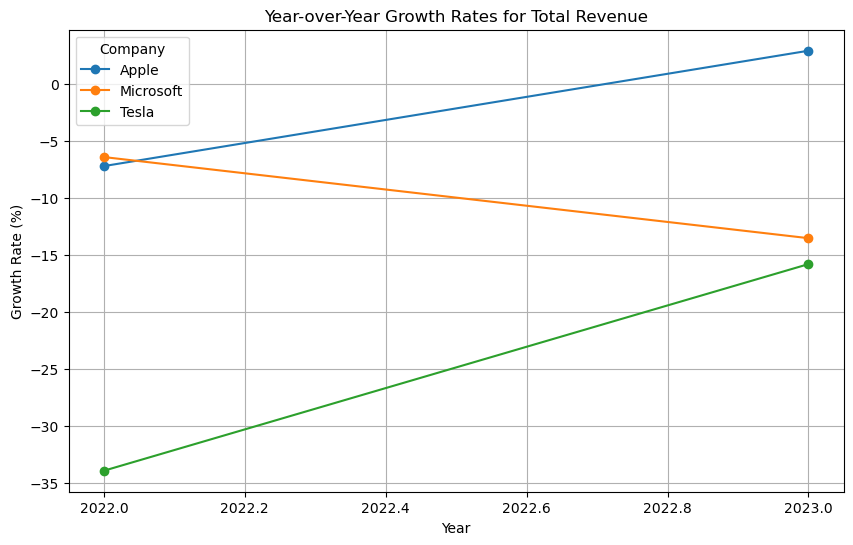

In [12]:
# Pivot and prepare data for growth calculation
growth_df = data_df.pivot_table(index=['Company', 'Year'], columns='Metric', values='Value', aggfunc='sum')

# Calculate year-over-year growth
growth_rates = growth_df.groupby('Company').pct_change(-1) * 100  # Calculate YoY change

# Remove rows with NaN values in the growth rate calculations (specifically for the year 2024)
growth_rates = growth_rates.dropna(how='all')

# Calculating financial ratios
growth_df['Net Profit Margin (%)'] = (growth_df['Net Income'] / growth_df['Total Revenue']) * 100
growth_df['Debt to Asset Ratio (%)'] = (growth_df['Total Liabilities'] / growth_df['Total Assets']) * 100
growth_df['Cashflow to Revenue Ratio (%)'] = (growth_df['Cashflow'] / growth_df['Total Revenue']) * 100

# Visualizing the data
fig, ax = plt.subplots(figsize=(10, 6))
growth_rates['Total Revenue'].unstack('Company').plot(ax=ax, marker='o')
ax.set_title('Year-over-Year Growth Rates for Total Revenue')
ax.set_xlabel('Year')
ax.set_ylabel('Growth Rate (%)')
plt.grid(True)
plt.legend(title='Company')
plt.show()

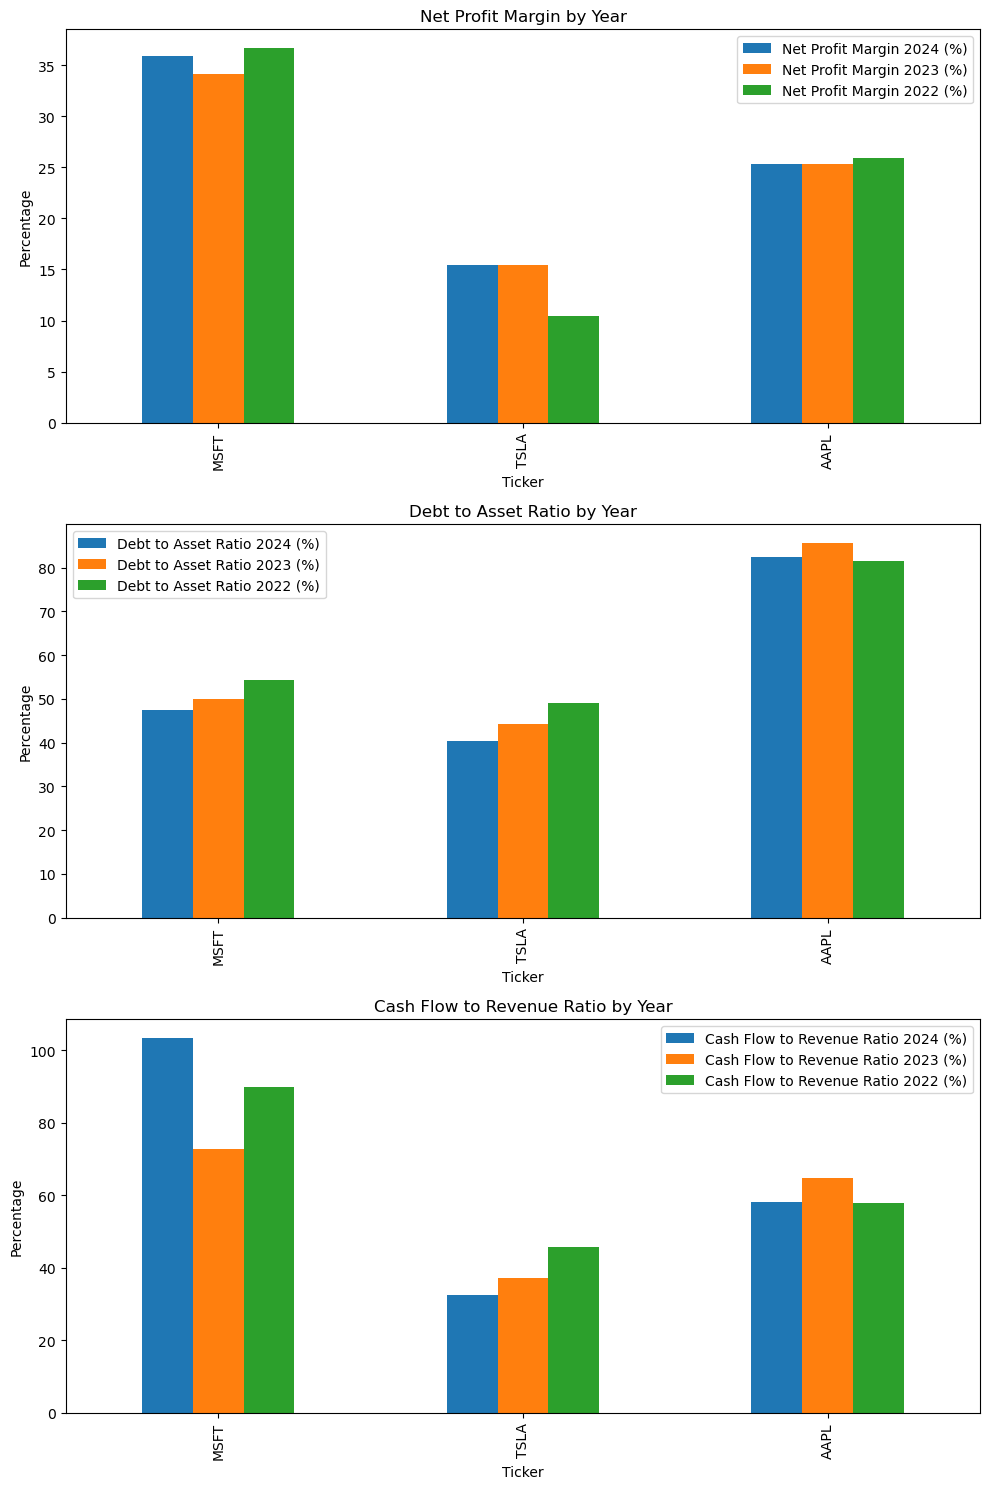

In [13]:
# Convert columns to numeric and calculate the metrics
df['Net Profit Margin 2024 (%)'] = (df['Net Income- 2024 ($)'] / df['Total Revenue- 2024 ($)']) * 100
df['Net Profit Margin 2023 (%)'] = (df['Net Income- 2023 ($)'] / df['Total Revenue- 2023 ($)']) * 100
df['Net Profit Margin 2022 (%)'] = (df['Net Income- 2022 ($)'] / df['Total Revenue- 2022 ($)']) * 100

df['Debt to Asset Ratio 2024 (%)'] = (df['Total Liabilities- 2024 ($)'] / df['Total Assets- 2024 ($)']) * 100
df['Debt to Asset Ratio 2023 (%)'] = (df['Total Liabilities- 2023 ($)'] / df['Total Assets- 2023 ($)']) * 100
df['Debt to Asset Ratio 2022 (%)'] = (df['Total Liabilities- 2022 ($)'] / df['Total Assets- 2022 ($)']) * 100

df['Cash Flow to Revenue Ratio 2024 (%)'] = (df['Cashflow- 2024 ($)'] / df['Total Revenue- 2024 ($)']) * 100
df['Cash Flow to Revenue Ratio 2023 (%)'] = (df['Cashflow- 2023 ($)'] / df['Total Revenue- 2023 ($)']) * 100
df['Cash Flow to Revenue Ratio 2022 (%)'] = (df['Cashflow- 2022 ($)'] / df['Total Revenue- 2022 ($)']) * 100

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Net Profit Margin
df.plot(x='Ticker', y=['Net Profit Margin 2024 (%)', 'Net Profit Margin 2023 (%)', 'Net Profit Margin 2022 (%)'], kind='bar', ax=axs[0])
axs[0].set_title('Net Profit Margin by Year')
axs[0].set_ylabel('Percentage')

# Debt to Asset Ratio
df.plot(x='Ticker', y=['Debt to Asset Ratio 2024 (%)', 'Debt to Asset Ratio 2023 (%)', 'Debt to Asset Ratio 2022 (%)'], kind='bar', ax=axs[1])
axs[1].set_title('Debt to Asset Ratio by Year')
axs[1].set_ylabel('Percentage')

# Cash Flow to Revenue Ratio
df.plot(x='Ticker', y=['Cash Flow to Revenue Ratio 2024 (%)', 'Cash Flow to Revenue Ratio 2023 (%)', 'Cash Flow to Revenue Ratio 2022 (%)'], kind='bar', ax=axs[2])
axs[2].set_title('Cash Flow to Revenue Ratio by Year')
axs[2].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

In [16]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
df.head()

,Company,Ticker,Total Revenue- 2024 ($),Total Revenue- 2023 ($),Total Revenue- 2022 ($),Net Income- 2024 ($),Net Income- 2023 ($),Net Income- 2022 ($),Total Assets- 2024 ($),Total Assets- 2023 ($),Total Assets- 2022 ($),Total Liabilities- 2024 ($),Total Liabilities- 2023 ($),Total Liabilities- 2022 ($),Cashflow- 2024 ($),Cashflow- 2023 ($),Cashflow- 2022 ($),Net Profit Margin 2024 (%),Net Profit Margin 2023 (%),Net Profit Margin 2022 (%),Debt to Asset Ratio 2024 (%),Debt to Asset Ratio 2023 (%),Debt to Asset Ratio 2022 (%),Cash Flow to Revenue Ratio 2024 (%),Cash Flow to Revenue Ratio 2023 (%),Cash Flow to Revenue Ratio 2022 (%)
0,Microsoft,MSFT,245122,211915,198270,88136,72361,72738,512163,411976,364840,243686,205753,198298,253275,154197,178222,35.955973,34.146238,36.686337,47.579774,49.942958,54.352045,103.326099,72.763608,89.888536
1,Tesla,TSLA,96773,81462,53823,14974,12587,5644,106618,82338,62131,43009,36440,30548,31429,30224,24568,15.473324,15.451376,10.486223,40.339342,44.256601,49.167082,32.477034,37.101962,45.645913
2,Apple,AAPL,383285,394328,365817,96995,99803,94680,352583,352755,352755,290437,302083,287912,222736,255254,211936,25.306234,25.309641,25.881793,82.374079,85.635356,81.618120,58.112371,64.731391,57.934978


In [17]:
df.to_clipboard(index=False)  # `index=False` to not copy the DataFrame's index
